In [1]:
from keras.preprocessing.image import ImageDataGenerator ,load_img,img_to_array,array_to_img
from keras import  Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow  import keras
import os,glob
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#import splitfolders

In [3]:
'''os.makedirs('output')
os.makedirs('output/train')
os.makedirs('output/val')
splitfolders.ratio('super/',output='output',seed=121,ratio=(0.8, 0.2))'''

"os.makedirs('output')\nos.makedirs('output/train')\nos.makedirs('output/val')\nsplitfolders.ratio('super/',output='output',seed=121,ratio=(0.8, 0.2))"

In [4]:
image_width=32
image_height=32
train_path='output/train/'
test_path='output/val/'
epochs = 50
batch_size = 32
num_of_train_samples = 8000
num_of_test_samples = 2000


In [5]:
datagen=ImageDataGenerator(
    rescale=1. / 255,

)
train_generator=datagen.flow_from_directory(
    train_path,
    target_size=(image_width, image_height),
    color_mode="grayscale",
    classes=None,
    class_mode="categorical",
    batch_size=batch_size,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="jpeg",
    follow_links=False,
    subset=None,
    interpolation="nearest"
)

test_generator=datagen.flow_from_directory(
    test_path,
    target_size=(image_width, image_height),
    color_mode="grayscale",
    classes=None,
    class_mode="categorical",
    batch_size=batch_size,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="jpeg",
    follow_links=False,
    subset=None,
    interpolation="nearest"
)

Found 34283 images belonging to 18 classes.
Found 8580 images belonging to 18 classes.


In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),
                 activation='relu',
                 input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(18, activation='softmax'))

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['categorical_accuracy'])

In [8]:
early_stopping = EarlyStopping(patience=5)

model.fit(train_generator,
          steps_per_epoch=num_of_train_samples // batch_size,
          epochs=epochs,
          validation_data=test_generator,
          validation_steps=num_of_test_samples // batch_size,
          callbacks=[early_stopping]
         )

Epoch 1/50
250/250 [==============================] - 210s 841ms/step - loss: 0.4397 - categorical_accuracy: 0.8631 - val_loss: 0.1110 - val_categorical_accuracy: 0.9688
Epoch 2/50
250/250 [==============================] - 133s 533ms/step - loss: 0.0626 - categorical_accuracy: 0.9826 - val_loss: 0.0451 - val_categorical_accuracy: 0.9854
Epoch 3/50
250/250 [==============================] - 97s 388ms/step - loss: 0.0415 - categorical_accuracy: 0.9871 - val_loss: 0.0360 - val_categorical_accuracy: 0.9894
Epoch 4/50
250/250 [==============================] - 76s 302ms/step - loss: 0.0353 - categorical_accuracy: 0.9895 - val_loss: 0.0213 - val_categorical_accuracy: 0.9914
Epoch 5/50
250/250 [==============================] - 62s 249ms/step - loss: 0.0172 - categorical_accuracy: 0.9951 - val_loss: 0.0123 - val_categorical_accuracy: 0.9970
Epoch 6/50
250/250 [==============================] - 47s 190ms/step - loss: 0.0124 - categorical_accuracy: 0.9964 - val_loss: 0.0199 - val_categorical_a

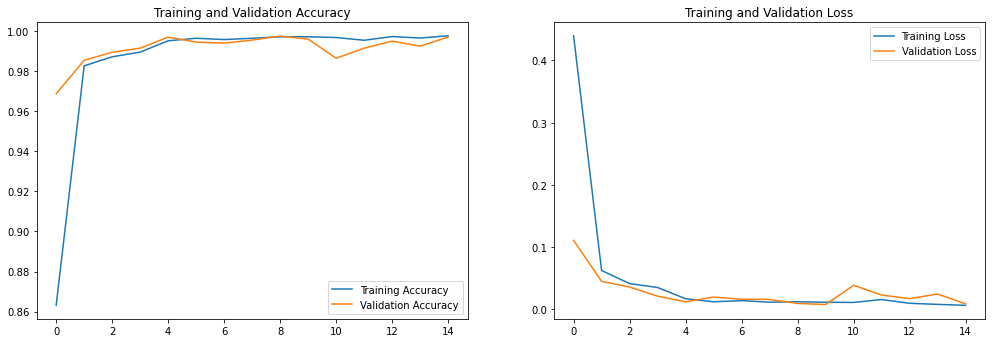

In [9]:
acc = model.history.history['categorical_accuracy']
val_acc = model.history.history['val_categorical_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

plt.figure(figsize=(17, 12))
plt.subplot(2, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [10]:
test_generator1 = ImageDataGenerator()
test_data_generator = test_generator1.flow_from_directory(
    test_path, # Put your path here
    target_size=(32, 32),
    color_mode='grayscale',
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

Found 8580 images belonging to 18 classes.


In [11]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys()) 

In [12]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

          01       1.00      1.00      1.00       581
          02       0.98      1.00      0.99       473
          03       1.00      0.98      0.99       459
          04       1.00      1.00      1.00       484
          05       1.00      1.00      1.00       461
          06       1.00      0.99      1.00       513
          07       0.99      1.00      1.00       536
          08       1.00      1.00      1.00       553
          09       1.00      0.99      0.99       564
          10       0.99      1.00      1.00       516
          11       1.00      1.00      1.00       528
          12       1.00      0.99      0.99       423
          13       1.00      1.00      1.00       536
          14       1.00      1.00      1.00       443
          15       0.99      1.00      1.00       390
          16       1.00      1.00      1.00       343
          17       1.00      1.00      1.00       353
          18       1.00    

In [13]:
cf_matrix=confusion_matrix(true_classes,predicted_classes)
print(cf_matrix)

[[579   1   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0]
 [  0 473   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1 451   1   0   0   0   1   0   2   0   0   1   1   1   0   0   0]
 [  0   0   1 482   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 460   0   0   1   0   0   0   0   0   0   0   0   0   0]
 [  2   1   0   0   0 510   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1 534   0   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 553   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   3   0 560   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 516   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 527   0   0   0   1   0   0   0]
 [  0   5   0   0   0   0   0   0   0   0   0 418   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 536   0   0   0   0   0]
 [  0   0   0   0   0   0

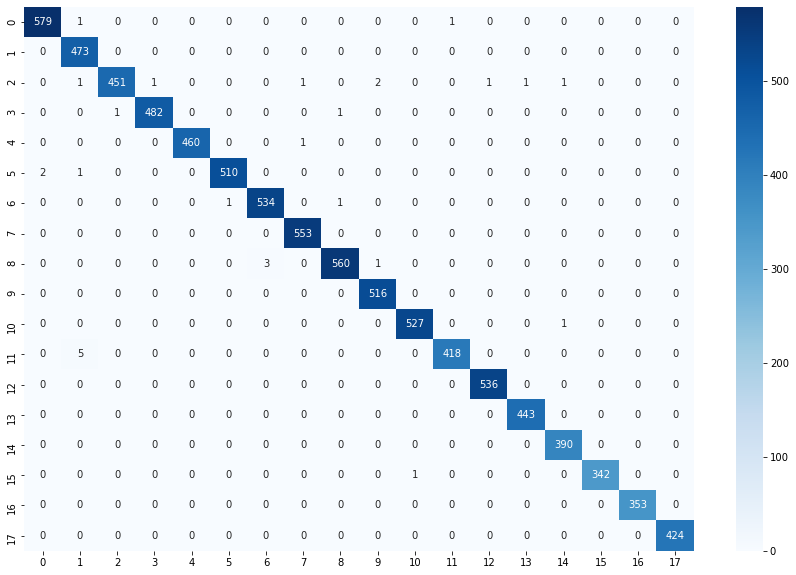

In [30]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(cf_matrix,annot=True,cmap='Blues', fmt='g')
plt.savefig('confusion_matrix.png')
plt.savefig('confusion_matrix.jpeg')

In [15]:
clf_report = classification_report(true_classes,
                                   predicted_classes,
                                   labels=list(range(1,19)),
                                   target_names=class_labels,
                                   output_dict=True)

C:\Users\shahdab\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahdab\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


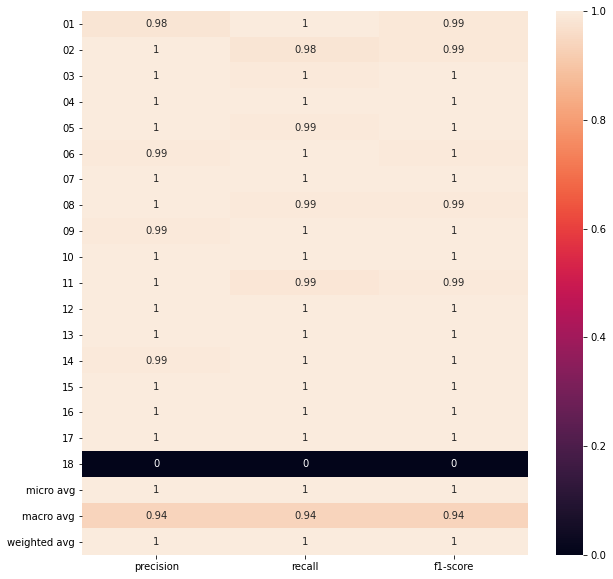

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.savefig('classification report.jpeg')
plt.savefig('classification report.png')

In [17]:
model.save('mySuperModel.h5')

In [18]:
mymodel=tf.keras.models.load_model('mySuperModel.h5')

In [32]:

        path=r'C:\Users\shahdab\Desktop\ssup\output\train\18\{}.jpeg'.format(i)
        image = tf.keras.preprocessing.image.load_img(path,color_mode='grayscale')
        input_arr = keras.preprocessing.image.img_to_array(image)
        input_arr = np.array([input_arr])
        prediction=np.argmax(mymodel.predict(input_arr),axis=-1)
        print(prediction[0]+1)
    except:
        pass

18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18


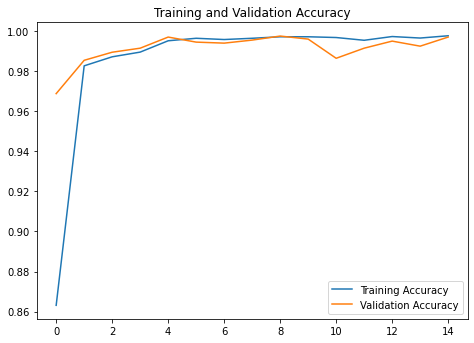

In [26]:

plt.figure(figsize=(17, 12))
plt.subplot(2, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.savefig('Training and Validation Accuracy.jpeg')
plt.savefig('Training and Validation Accuracy.jpeg')

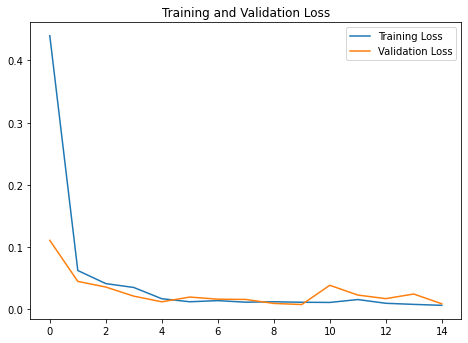

In [28]:
plt.figure(figsize=(17, 12))
plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('Training and Validation Loss')
plt.savefig('Training and Validation Loss.jpeg')

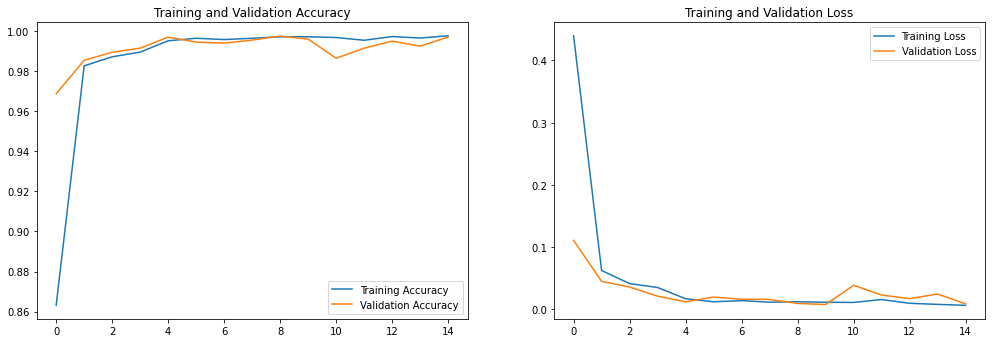

In [29]:
plt.figure(figsize=(17, 12))
plt.subplot(2, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('loss and accuracy.png')
plt.savefig('loss and accuracy.jpeg')